# Analyse en constituants à l'aide de Stanza

Le but de ce TP est de découvrir une autre bibliothèque permettant l'annotation linguistique et syntaxique en Python, [stanza](https://stanfordnlp.github.io/stanza/). Nous nous en servirons tout particulièrement pour sa possibilité de réaliser l'analyse en constituants. **Malheureusement, il n'existe pas encore de modèles pour réaliser l'analyse de constituant en français, nous allons donc travailler avec un texte en anglais.**
Téléchargez le fichier texte associé dans le GitHub, qui va être stocké dans le dossier `data`.

## Premier pas avec la bibliothèque

Utilisez `pip` pour install `stanza`.
`stanza` possède une interface à la fois **similaire** mais aussi **différente** par rapport à `spacy`, car elle ne travaille pas au niveau du `token` mais au niveau de la phrase en elle-même.

In [3]:
import stanza

# Création d'une pipeline qui permet la tokenisation, le POS, le lemme.
nlp = stanza.Pipeline('en', processors='tokenize,pos,lemma')

sentence = "the dog is happy"

doc = nlp(sentence)

2025-12-02 09:41:53 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2025-12-02 09:41:53 INFO: Downloaded file to /Users/sophrobhayek/stanza_resources/resources.json
2025-12-02 09:41:53 WARNING: Language en package default expects mwt, which has been added
2025-12-02 09:41:54 INFO: Loading these models for language: en (English):
| Processor | Package           |
---------------------------------
| tokenize  | combined          |
| mwt       | combined          |
| pos       | combined_charlm   |
| lemma     | combined_nocharlm |

2025-12-02 09:41:54 INFO: Using device: cpu
2025-12-02 09:41:54 INFO: Loading: tokenize
2025-12-02 09:41:54 INFO: Loading: mwt
2025-12-02 09:41:54 INFO: Loading: pos
2025-12-02 09:41:54 INFO: Loading: lemma
2025-12-02 09:41:54 INFO: Done loading processors!


In [5]:
# Itération sur les phrases
for phrase in doc.sentences:
    print(f"\nPhrase : {phrase.text}")
    print("-" * 30)
    # Itération sur les mots
    for mot in phrase.words:
        print(f"Mot : {mot.text:10} | POS : {mot.pos:5} | Lemme : {mot.lemma}")


Phrase : the dog is happy
------------------------------
Mot : the        | POS : DET   | Lemme : the
Mot : dog        | POS : NOUN  | Lemme : dog
Mot : is         | POS : AUX   | Lemme : be
Mot : happy      | POS : ADJ   | Lemme : happy


## Annotation linguistique avec stanza

**Exercice**:

Soit le texte présent dans `data/farewell_arms.txt`.

1. Chargez l'ensemble du texte.
2. En faisant l'hypothèse que 1 mot = 1 espace, comptez le nombre de mots dans la phrase.
3. En utilisant les lemmes, réalisez un dictionnaire qui contient pour chaque **mot distinct** (au sens du lemme) le nombre d'occurences dans le texte.
4. Retournez les mots les plus fréquents du texte.
5. Retournez grâce à Stanza le nombre de "NOUN" dans le texte.

## Analyse en constituant

Stanza permet, contrairement à `spaCy`, de réaliser l'analyse en constituants d'une phrase.

In [36]:
import stanza

nlp = stanza.Pipeline(lang='en', processors='tokenize,pos,constituency')
doc = nlp('This was a test')
for sentence in doc.sentences:
    print(sentence.constituency)

# Il est possible d'accéder de manière récursive aux différents étages de l'arbre
tree = doc.sentences[0].constituency
print(tree.children)

2025-12-02 13:40:02 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2025-12-02 13:40:02 INFO: Downloaded file to /Users/sophrobhayek/stanza_resources/resources.json
2025-12-02 13:40:02 WARNING: Language en package default expects mwt, which has been added
2025-12-02 13:40:03 INFO: Loading these models for language: en (English):
| Processor    | Package             |
--------------------------------------
| tokenize     | combined            |
| mwt          | combined            |
| pos          | combined_charlm     |
| constituency | ptb3-revised_charlm |

2025-12-02 13:40:03 INFO: Using device: cpu
2025-12-02 13:40:03 INFO: Loading: tokenize
2025-12-02 13:40:03 INFO: Loading: mwt
2025-12-02 13:40:03 INFO: Loading: pos
2025-12-02 13:40:04 INFO: Loading: constituency
2025-12-02 13:40:04 INFO: Done loading processors!


(ROOT (S (NP (DT This)) (VP (VBD was) (NP (DT a) (NN test)))))
((S (NP (DT This)) (VP (VBD was) (NP (DT a) (NN test)))),)


La bibliothèque `nltk` permet de visualiser sous format d'arbre le parsing en constituant au format `ascii`. Installez `nltk` et la bibliothèque complémentaire `svgling`.

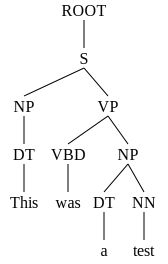

In [39]:
from nltk.tree import Tree

Tree.fromstring(str(sentence.constituency))

**Exercices**:

1. Soit la phrase: "the dog that is pursuing the cat that yells strongly". Représentez l'arbre sous forme de représentation graphique. Trouvez l'abbréviation pour les clauses subordonnées et donnez leur nombre dans la phrase d'exemple.
2. Soit la phrase "I see Mary in my pajama". Rappelez le problème possible avec l'analyse de ce type de phrase, et observez quelle solution propose Stanza en générant une représentation graphique de l'arbre. 

**Exercices**:

En reprenant le texte d'Hemingway:
1. En reprenant le texte d'Hemingway, comptez les groupes nominaux.
2. Comptez pour chaque phrase le nombre d'enfants au premier niveau.
3. Trouvez toutes les occurrences de la structure "NP PP".
3. Calculez le nombre moyen de clause subordonnée par phrase. 